# Module 8 - Final Project

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. In module4 (Database) there also was an abbreviated example data story.  Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for you data story to a single, relatively simple perspective.

- Identify already available data that affords addressing your problem.  If using completely new data, know it well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments that explain the purpose of the operation(s).


Make your project unique by

- Comparing two or more different statistical/machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources.
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write a story around it.




## Step 0: Choose your Language for this Adventure:

For this project I will be using `Python` Language

## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview the story you hope to uncover.

The goal is of predicting the quality of the wine using the results of physicochemical tests. The data set are of the vinho verde wine samples from Portugal. (Reference:- UCI website https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

Who will the audience be?

I think that this data set and the project will be very useful for industrial purposes, in manufacturing of the wine and also for the wine enthusiast who wants to know the technical details of the wine. 

What value will they derive from your story?

I think that this project we add a value to wine making process.  

## Step 3: Find and Stage Your Data

The name of the file that is uploaded in the JupyterHub environment is `"white.csv"` . Path for the file is `modules/module8/exercises/myData/white.csv`

## Step 4: Vet Data Sources


We will stat with setting up the development environment by importing libraries or packages needed for this project. 

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model


We will now read in the csv file "white.csv" and print it to look at the data we have for this project 

In [23]:
df = pd.read_csv('myData/white.csv', sep=",")
df.head()

,fixed acidity,volatile aciditiy,citric acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


We will now run the describe funtion to get the summary of our dataframe.

In [24]:
df.describe()


,fixed acidity,volatile aciditiy,citric acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4873.000000,4897.000000,4897.000000,4895.000000,4896.000000,4895.000000,4893.000000,4896.000000,4898.000000,4882.000000,4898.000000
mean,6.854788,0.278236,0.334203,6.389187,0.045773,35.310662,138.379265,0.994029,3.188286,0.489847,10.514170,5.877909
std,0.843868,0.100855,0.121030,5.070179,0.021854,17.009365,42.496115,0.002992,0.150950,0.114126,1.230577,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993750,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [25]:
df.shape 


(4898, 12)

Looking at the summary we understand that the data dosen't have any negative or invalid values present in it. Also we have the mean, standard deviation, quartile values ,etc of out data frame. Now we will look into the data frame if we have any null or NaN values present as this might affect our final output. 

In [26]:
df.isnull().sum()

fixed acidity            0
volatile aciditiy       25
citric acidity           1
residual sugar           1
chlorides                3
free sulfur dioxide      2
total sulfur dioxide     3
density                  5
pH                       2
sulphates                0
alcohol                 16
quality                  0
dtype: int64


We can see that there are many NaN values present in the dataframe. To solve this we will take the mean value of the column and fill it in place of the NaN values.

In [27]:
df['volatile aciditiy']=df['volatile aciditiy'].fillna((df['volatile aciditiy'].mean()))
df['citric acidity']=df['citric acidity'].fillna((df['citric acidity'].mean()))
df['residual sugar']=df['residual sugar'].fillna((df['residual sugar'].mean()))
df['chlorides']=df['chlorides'].fillna((df['chlorides'].mean()))
df['free sulfur dioxide']=df['free sulfur dioxide'].fillna((df['free sulfur dioxide'].mean()))
df['total sulfur dioxide']=df['total sulfur dioxide'].fillna((df['volatile aciditiy'].mean()))
df['density']=df['density'].fillna((df['density'].mean()))
df['pH']=df['pH'].fillna((df['pH'].mean()))
df['alcohol']=df['alcohol'].fillna((df['alcohol'].mean()))
df['quality']=df['quality'].fillna((df['quality'].mean()))



We will run the isnull() function again to check if the above code has ran successfully or not 

In [28]:
df.isnull().sum()

fixed acidity           0
volatile aciditiy       0
citric acidity          0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can now see that the there are no null values as they are replaced by the mean values. 

## Step 5: Filter Results and Build and Validate Models

As our final goal is to predict the quality of the wine, our target variable or target column is the "quality" column. So, in order to check the unique values present in the "quality" column we will run the unique() function. 

In [29]:
sorted(df['quality'].unique())


[3, 4, 5, 6, 7, 8, 9]

The above out put shows us that the range of the quality of wine lies between 3 and 9. 

We will see how the wine data is distributed between the range of quality in the dataset.

In [30]:
count = df.quality.value_counts().sort_index()
count

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

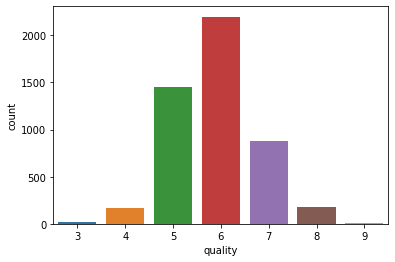

In [31]:
sns.countplot(x='quality', data=df)


This distribution represents that the range of wine quality is between "3 to 9" and maximum of the wine lies between the range of "5 to 7". 

We will now check the correlation between all of the colums present in the dataset.

In [32]:
df.corr()

,fixed acidity,volatile aciditiy,citric acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.021165,0.289224,0.089195,0.022945,-0.049680,0.091203,0.265841,-0.426127,-0.017143,-0.121459,-0.113663
volatile aciditiy,-0.021165,1.000000,-0.147567,0.065497,0.070561,-0.097416,0.088925,0.028205,-0.032931,-0.036177,0.066325,-0.194283
citric acidity,0.289224,-0.147567,1.000000,0.094672,0.114375,0.094192,0.121754,0.149749,-0.164057,0.062244,-0.076676,-0.009093
residual sugar,0.089195,0.065497,0.094672,1.000000,0.088566,0.299623,0.400130,0.838399,-0.193756,-0.026447,-0.449303,-0.097684
chlorides,0.022945,0.070561,0.114375,0.088566,1.000000,0.101369,0.198409,0.257008,-0.090665,0.016792,-0.360197,-0.209931
free sulfur dioxide,-0.049680,-0.097416,0.094192,0.299623,0.101369,1.000000,0.614866,0.294281,-0.001047,0.058975,-0.248806,0.008613
total sulfur dioxide,0.091203,0.088925,0.121754,0.400130,0.198409,0.614866,1.000000,0.528151,0.000075,0.133429,-0.446204,-0.175066
density,0.265841,0.028205,0.149749,0.838399,0.257008,0.294281,0.528151,1.000000,-0.094755,0.074581,-0.778438,-0.307120
pH,-0.426127,-0.032931,-0.164057,-0.193756,-0.090665,-0.001047,0.000075,-0.094755,1.000000,0.156605,0.123107,0.100232
sulphates,-0.017143,-0.036177,0.062244,-0.026447,0.016792,0.058975,0.133429,0.074581,0.156605,1.000000,-0.018154,0.053678


But we need correlation of the every other feature with the quality of wine. 

In [34]:
df.corr()['quality']

fixed acidity          -0.113663
volatile aciditiy      -0.194283
citric acidity         -0.009093
residual sugar         -0.097684
chlorides              -0.209931
free sulfur dioxide     0.008613
total sulfur dioxide   -0.175066
density                -0.307120
pH                      0.100232
sulphates               0.053678
alcohol                 0.435620
quality                 1.000000
Name: quality, dtype: float64

In [35]:
conditions = [
    (df['quality'] >= 7),
    (df['quality'] <= 4)
]
wine_rating = ['good', 'bad']
df['wine_rating'] = np.select(conditions, wine_rating, default='moderate')
df.wine_rating.value_counts()



moderate    3655
good        1060
bad          183
Name: wine_rating, dtype: int64

In [36]:
df.groupby('wine_rating').mean()

,fixed acidity,volatile aciditiy,citric acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
wine_rating,,,,,,,,,,,,
bad,7.180874,0.375974,0.307705,4.821038,0.050557,26.624648,129.894963,0.994343,3.183388,0.475956,10.178493,3.890710
good,6.725142,0.265273,0.326108,5.261509,0.038160,34.563972,125.133281,0.992412,3.215404,0.500142,11.415752,7.174528
moderate,6.876060,0.277102,0.337877,6.794744,0.047742,35.962107,142.532224,0.994482,3.180667,0.487557,10.269506,5.601368


# Building the Model 

We will now start working on building the linear regression model for predicting the quality of the wine. 

For this we will first Start by creating a training and testing dataframes for our model. We will assign 80% of data for the train model and 20% for the test model.

In [37]:
train = df.sample (frac= 0.80, random_state = 1)
test = df.drop(train.index)


We now need to create numpy arrays for our traning and testing datasets. As we are predicting the quality of the wine our target variable will be quality variable. We will call the input for training set train_X and the target train_y, and the inputs for the testing set test_X and test_y for the target.

In [38]:
train_X = np.asarray(train[['fixed acidity', 'volatile aciditiy', 'citric acidity','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
train_y = np.asarray(train.quality)

test_X = np.asarray(test[['fixed acidity','volatile aciditiy','citric acidity','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol']])
test_y = np.asarray(test.quality)


# Performing Naïve Bayes Classification

We will now do the Naïve Bayes Classification which is ML algorithm for doing prediction. And we will then train the training data set by using the fit() function.

In [39]:
nbc = GaussianNB()
nbc.fit(train_X, train_y)


GaussianNB(priors=None, var_smoothing=1e-09)

We will now check for the mislabeled points in our dataset as this gives us an idea about what part of our data was misclassified.  

In [40]:
y_pred = nbc.fit(train_X, train_y).predict(test_X)
print("Number of mislabeled points out of a total {} points : {}"
      .format(len(test),(test_y != y_pred).sum()))
print("Error Rate :{}".format((test_y != y_pred).sum()/len(test)))


Number of mislabeled points out of a total 980 points : 566
Error Rate :0.5775510204081633


# Training Model for training data set using the fit() function

In [41]:
regr = linear_model.LinearRegression()

In [42]:
regr.fit(train_X, train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
regr.intercept_

135.02156433501372

In [44]:
coefficients = zip(['fixed acidity', 'volatile aciditiy', 'citric acidity','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], regr.coef_)
list(coefficients)

[('fixed acidity', 0.05111538406638778),
 ('volatile aciditiy', -1.8348096152150923),
 ('citric acidity', 0.056898245356952065),
 ('residual sugar', 0.07557258418585797),
 ('chlorides', -0.19231693424728732),
 ('free sulfur dioxide', 0.0032202092701458795),
 ('total sulfur dioxide', -0.0003741449712324485),
 ('density', -134.96704030895052),
 ('pH', 0.6487610637912542),
 ('sulphates', 0.6107779337757259),
 ('alcohol', 0.2144337118275393)]

# Accessing Model using R-Squared Value

In [45]:
print('R-Squared value of Training Set is : {}'.format(regr.score(train_X, train_y)))

R-Squared value of Training Set is : 0.2861590678899255


In [46]:
print('R-Squared value of Testing Set is: {}'.format(regr.score(test_X, test_y)))

R-Squared value of Testing Set is: 0.25957349417117737


# Predicting the Quality

In [47]:
pred = regr.predict(test_X)
pred

array([5.76054279, 5.79559203, 5.65373658, 6.3067178 , 5.79156222,
       5.93918461, 5.70650888, 5.89478135, 5.46848294, 5.4700792 ,
       6.19263398, 5.70843535, 5.46192547, 5.5853199 , 5.38889656,
       5.39837722, 6.04764259, 6.27861255, 5.58749872, 5.17116869,
       5.14736259, 5.61533786, 5.50300323, 5.88337778, 5.96800301,
       5.63712541, 5.17092781, 6.37727998, 5.47814177, 5.41184916,
       5.82520369, 5.66741123, 6.11887061, 5.88566015, 6.34022302,
       5.29308405, 5.92811319, 5.46547045, 5.46547045, 5.65660734,
       5.87734356, 6.04725613, 4.23186413, 5.8634495 , 5.6355912 ,
       5.913428  , 5.68297904, 5.68297904, 5.76801182, 6.30262415,
       5.56616909, 5.14004093, 6.40576902, 5.78598939, 5.56744514,
       5.18410216, 5.14568285, 5.38859757, 5.33089917, 5.81350354,
       6.11289319, 5.57266404, 5.99669593, 6.11282027, 5.93845548,
       5.67187174, 5.90921377, 5.68876623, 6.00772541, 6.1129234 ,
       5.53058689, 5.31475564, 5.708487  , 5.58051305, 5.71789

## Step 6: Visualize Results

We will now see how the diffrent features of the wine can affect the quality of the wine by plotting the features with quality of the wine.

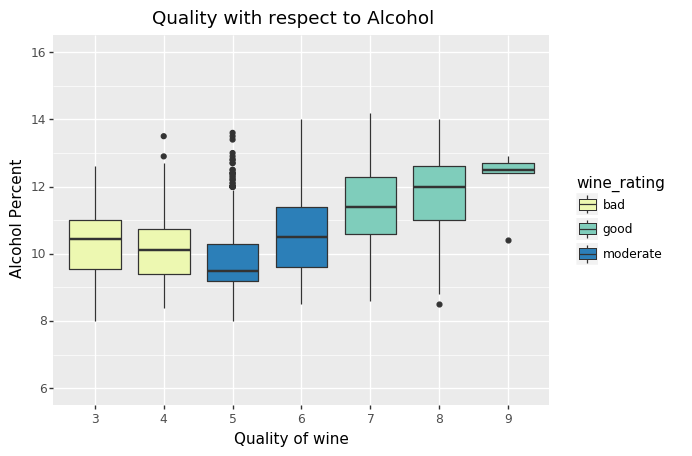

<ggplot: (8758139460956)>

In [48]:
p = (
    ggplot(df, aes(x = "factor(quality)", y ="alcohol", fill = 'wine_rating'))
    + geom_boxplot()
    + xlab("Quality of wine ")
    + ylab("Alcohol Percent")
    + ggtitle("Quality with respect to Alcohol")
    + scale_fill_brewer(palette="YlGnBu")
)
p + ylim(6, 16)

In the above plot wecan see that, as the alcohol percentage goes on increases the quality of the wine also improves with it.

We will now plot Quality with the respect to Suphates and see howo it affects the quality of the wine.

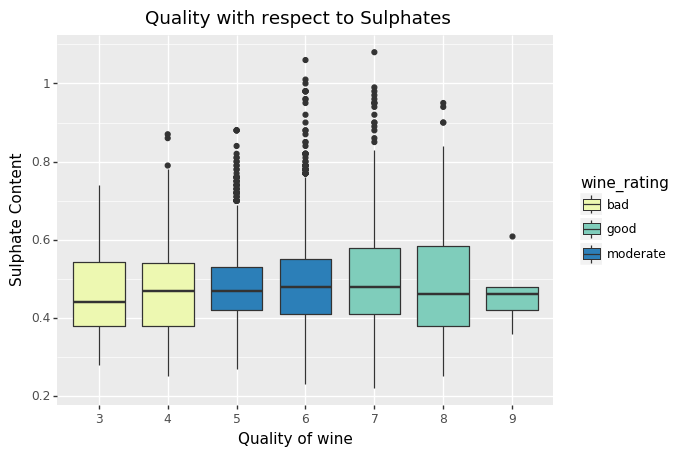

<ggplot: (-9223363278715408903)>

In [49]:
p1 = (
    ggplot(df, aes(x = "factor(quality)", y ="sulphates", fill = 'wine_rating'))
    + geom_boxplot()
    + xlab("Quality of wine ")
    + ylab("Sulphate Content")
    + ggtitle("Quality with respect to Sulphates")
    + scale_fill_brewer(palette="YlGnBu")
)
p1



As we can see that there is not much of the diffrence that the content of suphates has on the quality of wine.

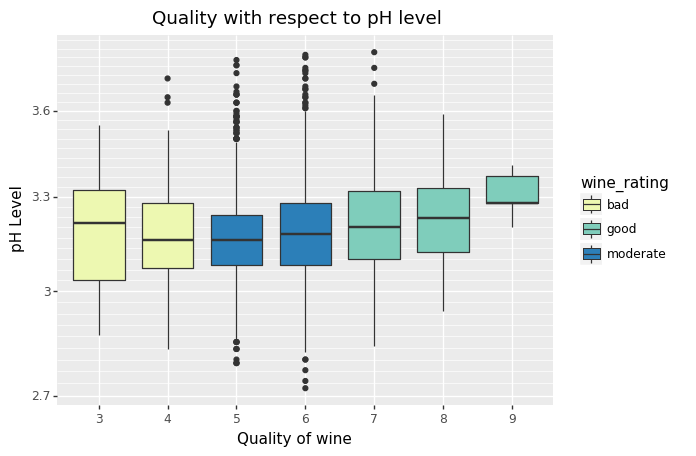

<ggplot: (8758139350227)>

In [50]:
p2 = (
    ggplot(df, aes(x = "factor(quality)", y ="pH", fill = 'wine_rating'))
    + geom_boxplot()
    + xlab("Quality of wine ")
    + ylab("pH Level")
    + ggtitle("Quality with respect to pH level")
    + scale_fill_brewer(palette="YlGnBu")
)
p2 + scale_y_log10()

In case of pH it is evident that the ph level increases with the quality of wine. 

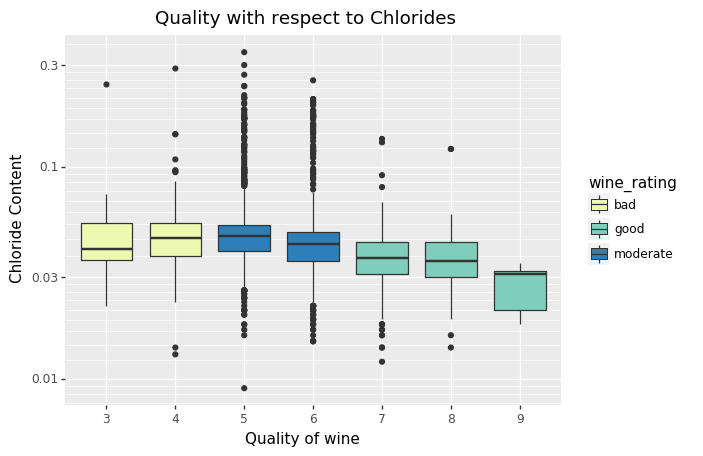

<ggplot: (-9223363278715557614)>

In [51]:
p3 = (
    ggplot(df, aes(x = "factor(quality)", y ="chlorides", fill = 'wine_rating'))
    + geom_boxplot()
    + xlab("Quality of wine ")
    + ylab("Chloride Content")
    + ggtitle("Quality with respect to Chlorides")
    + scale_fill_brewer(palette="YlGnBu")
)
p3 + scale_y_log10()

From above graph it is evident that if the content of chloride is higher then it affects the quality of the wine. 

We will now plot a linear model of alcohol and residual sugar and will compare with the rating of wine. 

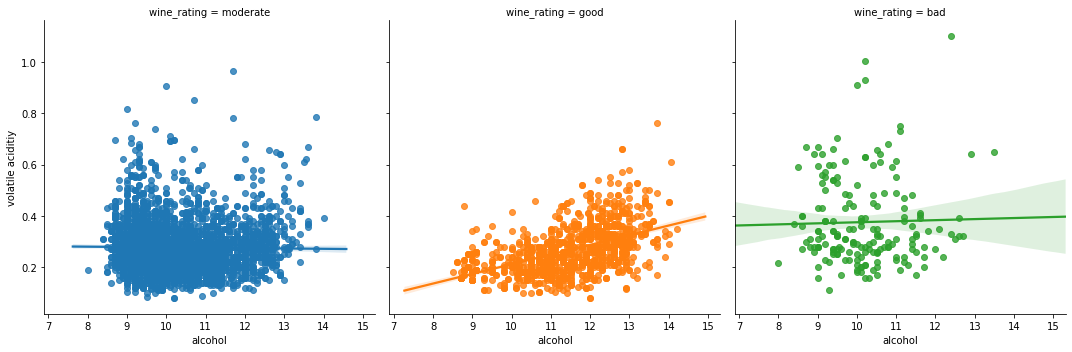

In [80]:
sns.lmplot(x = "alcohol", y = "volatile aciditiy", col = "wine_rating", data = df, hue = 'wine_rating') 

The above plot is a linear regression plot of white wine, rated on the basis of the quality of the wine(moderate, good and bad). The plot show us the regression between the Alcohol content and the volatile acidity of white wine. 

## Step 7: Communicate the Story to your intended audience using visualizations and narrative



Vinho Verde wine which comes from a very small region in the North of Portugal which is famous for there white wines. The data set has results of a  physical chemsistry (physicochemical test) on the white wine. The variables of the data are different types of acidities like fixed, volatile, citric; it also has datapoints for free and total sulphur dioxides. The data set also give us the details about the density, pH, suphates level and the alcohol percent of the wine. For our project we have `quality` variable as our target variable and the goal was to find how different features or contents of the wine can change the quality of the wine. 

To understand that we plotted some boxplot to findout the relation between different features of the wine. If we see the plot with title `Quality with respect to Alcohol` and `Quality with respect to pH Level` we can see that the alcohol percent is directly propotionate to the quality of the wine but if we see the plot `Quality with respect to Sulphates` it does not really affect the quality of the wine. 

In case of chlorides (refer plot `Quality with respect to Chlorides`) we can see that the high quality wine has less chlorides in it as chlorides add the saltiness to the wine which detracts the overall taste of the wine, which in turn reduces the quality of the wine. 

For the Linear regression model plot we used the relation between the alcohol percent and volatile acidity of the wine. Volatile acidity is the measurement of the volatile acide in the wine, which is mainly the acetic acid which is responisble for the smell and taste of vinegar. From the plot we can see that for the good quality wine trend line is increasing gradualy with the increase in alcohol content. 

This various realtion of wine with it's own feature can help in the wine manufacturer in the wine making process to make more good quality wine or maybe in improving the manufacturing process to produce some better wine. 






# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



`Stage 1: Project Definition, Requirements, & Expectations stage`
This stage is very impotant as it the starting process of the project. For this stage I had to figure out what my problem statement should be in order to work on my project. After finding the data and reading through it, it was crucial to understand the data and try to figure out what expectation can we solve using this data. 

`Stage 2: Data Acquisition, Goveranance, Curationa and Source Code Management`
To work on any data realted project it is crucial to have dataset which can us with our project definition and our expectation. So finding the data from a trusted source is really necesary. And for my project I got the data set from a open website so there was no issue with the goveranance aspet of this stage 

`Stage 3: Data Shaping and Carpentry`
After collecting the data it is necessary to perform data carpentry on it to see if there are any discrepancy in it. For my case I had to replace the NaN values. If I had not done it at the starting stage of my project it would have affected my results. 

`Stage 4: Expolatory Data Analysis and Visulization`
Exploring the data helps us in understanding the data values of the data. It also helps us to analyse the range of the datapoints. In my case as I was predicting the quality, Expolatory data analysis on the quality column helped me understand the range of the values present in the dataset. 

`Stage 5: Statistical/Machine Learning Model Planning Building Testing`
In this stage I planned on what variables to use for linear regression model and get the desired results. For this stage I tried with different variabels of training and testing data set ratios. 

`Stage 6: S/ML Model Validation, Visulization, Interpretation `
For this stage I performed various visulization plots like `Quality with respect to Alcohol`, `Quality with respect to pH Level` etc to understad how the data is performing and how it can be useful for the intended audience to interpret the results. 

`Stage 7: Data Story/Product Development Reporting `
This stage is almost the end of our project so it is important to explain what all things we have performed and what is the outcome of our project.

`Stage 8: S/ML Model/Product Development & Monitoring`
In this stage the project can be used by the audience or the wine manufacturer if they have the certain features required by the model, they can pass it to the model and use it accordingly for development. 
